In [1]:
%%HTML
<h2 align="center" style="color: red;">ML model Linear regression with single variable </h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("price_data.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## further with this scatter diagram best fit line must be found, that work is done using LinearRegression() object. that will find the slop and intercept of the linear equation y = mx + c ( the best fit line from all possible ) 

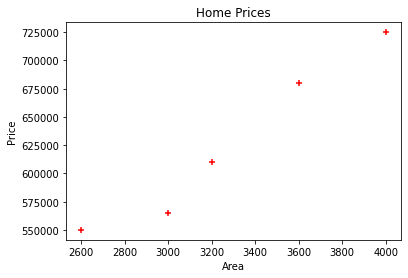

In [10]:
%matplotlib inline
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Home Prices")
plt.scatter(df.area,df.price,color="red",marker="+")

In [28]:
%%HTML
<h2 align="center" style="color:red;"> This is how best fit line is obtained </h2>
<img src="bestfit.jpg" />

In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

In [22]:
#reg.predict(np.array(3300).reshape(-1,1))
reg.predict([[3300]])
# both working
# warning is given, that i don't know why

C:\Users\CHARMEE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

## y = mx + c
## m=>slope (coef_) 
## c=> intercept (intercept_)

In [23]:
reg.coef_

array([135.78767123])

In [24]:
reg.intercept_

180616.43835616432

In [29]:
# our equation is y = m*x + c
# here x = 3300, m = coef_ and c = intercept_

### here price only depend on the area

In [30]:
reg.predict([[5000]])

C:\Users\CHARMEE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## above we had only two areas for which we needed to predict prices , now we can also have list of areas (or say another csv file containing list of areas ) and predictions to be written in another csv file

In [31]:
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


## we passed whole data frame to regression object, and it gave prices to all of them

In [32]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ])

In [33]:
p = reg.predict(d)
d['prices']=p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [35]:
d.to_csv("prediction.csv",index=False)

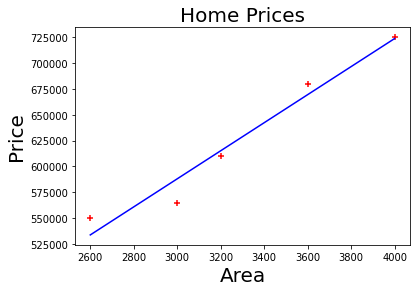

In [41]:
%matplotlib inline
plt.xlabel("Area",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title("Home Prices",fontsize=20)
plt.scatter(df.area,df.price,color="red",marker="+")

#best fit line
plt.plot(df.area,reg.predict(df[['area']]),color="blue")